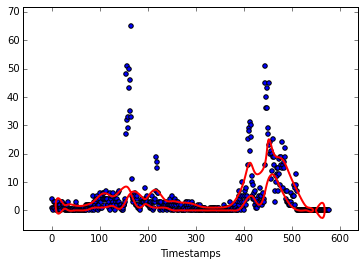

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from urllib2 import Request, urlopen
from sklearn.covariance import EmpiricalCovariance, MinCovDet, EllipticEnvelope
from sklearn import svm
from scipy import stats

request=Request('https://api.myjson.com/bins/wijb')
response = urlopen(request)
ds = response.read()
data = json.loads(ds)
df = json_normalize(data['stats']['efc21894c8795ad91601e0ae5c1c6b32'])

columns = list(df)
df = df.T
df['timestamp'] = columns
df.columns.values[0] = 'value'
cols = list(df.columns)
cols = cols[-1:] + cols[:-1]
df = df[cols]
fx = np.linspace(0, len(df), len(df))
df.index = np.round(fx)
plt.xlabel('Timestamps')
plt.scatter(fx, df['value'])
plt.autoscale(tight=True)
df['timestamp'] = df.index


xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], len(df)), 
                     np.linspace(plt.ylim()[0], plt.ylim()[1], len(df)))
zz = np.c_[xx.ravel(), yy.ravel()]

sv = svm.OneClassSVM(kernel='rbf', nu=0.37, gamma=0.0025, max_iter=-1, shrinking=False)
sv.fit(df)
decis = sv.decision_function(zz)
decis_res = decis.reshape(xx.shape)

a = plt.contour(xx, yy, decis_res, levels=[0], linewidths=2, colors='red')

plt.show()

In [ ]:
#fp2 = np.polyfit(df1['time'],df1['value'],10)
#f2 = np.poly1d(fp2)
#plt.plot(fx, f2(fx), linewidth=4)

#def error(f,x,y):
#    return np.sum((f(x)-y)**2)